<a href="https://colab.research.google.com/github/matheus97eng/Bootcamp_Alura_2021/blob/main/modulo-2/aulas/notebooks/aula_2-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtendo dados de aulas anteriores

Para melhor organização e reprodução, todos os dados das aulas são retirados [deste repositório](https://github.com/matheus97eng/Bootcamp_Alura_2021/tree/main/modulo-2/aulas/data). Lá você também encontra a descrição de cada um deles. Vamos transformá-los novamente em dataframes.

In [1]:
import pandas as pd

dados = 'https://github.com/matheus97eng/Bootcamp_Alura_2021/raw/main/modulo-2/aulas/data/out_ordenado_por_total%20(1).csv'
ordenado_por_total = pd.read_csv(dados, index_col='Unidade da Federação')
ordenado_por_total.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.728349e+08,1.704818e+08,1.702783e+08,1.724022e+08,1.754166e+08,1.795250e+08,1.798981e+08,1.800822e+08,1.916852e+08,1.905397e+08,1.770864e+08,1.923216e+08,1.785964e+08,2.169516e+08,2.150530e+08,2.128902e+08,2.126709e+08,2.140412e+08,2.152125e+08,2.141354e+08,2.160566e+08,2.089739e+08,1.921271e+08,2.134679e+08,1.957848e+08,2.393239e+08,2.211730e+08,2.317775e+08,2.239338e+08,2.240679e+08,2.480101e+08,2.240530e+08,2.389355e+08,2.254841e+08,2.106115e+08,2.290870e+08,2.215980e+08,2.413999e+08,2.298212e+08,2.507936e+08,...,2.634718e+08,2.921134e+08,2.743011e+08,2.835346e+08,3.005937e+08,2.672972e+08,2.871148e+08,2.671132e+08,2.594517e+08,2.794976e+08,2.540046e+08,2.852706e+08,2.861920e+08,2.914409e+08,2.789260e+08,2.858519e+08,2.954193e+08,2.775762e+08,3.014549e+08,2.781143e+08,2.662398e+08,2.910814e+08,2.676625e+08,2.855763e+08,2.925848e+08,3.089256e+08,2.814051e+08,3.066340e+08,3.023673e+08,2.936857e+08,3.033825e+08,2.823918e+08,2.726977e+08,3.019912e+08,2.713568e+08,2.766063e+08,2.516964e+08,3.028577e+08,2.990609e+08,2.827096e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.960865e+07,8.220022e+07,8.037412e+07,8.240015e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002407e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.896806e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008298e+08,1.054856e+08,9.966612e+07,1.033570e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077389e+08,1.031408e+08,1.110660e+08,1.060943e+08,1.154872e+08,...,1.367151e+08,1.534121e+08,1.442914e+08,1.475335e+08,1.560556e+08,1.422851e+08,1.483061e+08,1.423239e+08,1.383412e+08,1.465016e+08,1.307021e+08,1.514962e+08,1.506876e+08,1.535893e+08,1.502518e+08,1.566340e+08,1.604200e+08,1.459410e+08,1.572476e+08,1.481728e+08,1.453872e+08,1.531773e+08,1.426692e+08,1.519436e+08,1.579226e+08,1.635915e+08,1.541148e+08,1.667357e+08,1.617078e+08,1.574197e+08,1.661338e+08,1.521067e+08,1.523986e+08,1.580979e+08,1.413232e+08,1.470786e+08,1.263306e+08,1.368673e+08,1.359776e+08,1.204672e+08
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.060277e+08,1.205353e+08,1.117253e+08,1.185902e+08,1.221228e+08,1.106561e+08,1.175677e+08,1.124575e+08,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270739e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274470e+08,1.325766e+08,1.248583e+08,1.346213e+08,1.271741e+08,1.261727e+08,1.338480e+08,1.262094e+08,1.135453e+08,1.222688e+08,1.160616e+08,1.144770e+08,9.672711e+07,1.061037e+08,9.290146e+07,8.032085e+07
43

## Organizando o dataframe para a aula

Na aplicação desta aula será melhor se transpormos o dataframe, colocando as datas como índices

In [2]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,15 Pará,21 Maranhão,32 Espírito Santo,24 Rio Grande do Norte,25 Paraíba,53 Distrito Federal,50 Mato Grosso do Sul,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
2008/Fev,1.728349e+08,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008/Mar,1.704818e+08,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008/Abr,1.702783e+08,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008/Mai,1.724022e+08,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008/Jun,1.754166e+08,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


# Aula 4 - Trabalhando DateTime e Melt

Quando temos dados que contam tempo, seja dias, segundo, ou anos, é mais fácil trabalhar os dados como sendo do tipo datetime. Há uma biblioteca específica python para trabalhar com quantidades temporais, chamada `datetime`. Para o caso específico que queremos trabalhar, usaremos o módulo `date` desta biblioteca, que trabalha apenas com dias, meses e anos, não com horas, minutos e segundos, como o `datetime`.

In [3]:
from datetime import date

O que queremos nessa aula é transformar os índices do tipo string para o tipo date. Para isso usaremos a função `to_date`, que verificará a classicação de cada string com ano e mês retornando uma data do tipo que queremos trabalhar. Para verificação dos meses, utilizaremos um dicionário. Convencionaremos que todos os índices terão como dia o primeiro do mês.

Depois de `to_date` definida vamos utilizar a função `map`, que aplicará a função para todos os índices de `mensal`.

In [4]:
meses = {
    'Jan':1,
    'Fev':2,
    'Mar':3,
    'Abr':4,
    'Mai':5,
    'Jun':6,
    'Jul':7,
    'Ago':8,
    'Set':9,
    'Out':10,
    'Nov':11,
    'Dez':12
}

def to_date(ano_mes):
  ano = int(ano_mes[:4])
  mes = meses[ano_mes[5:]]
  return date(ano, mes, 1)

mensal.index.map(to_date)

Index([2008-02-01, 2008-03-01, 2008-04-01, 2008-05-01, 2008-06-01, 2008-07-01,
       2008-08-01, 2008-09-01, 2008-10-01, 2008-11-01,
       ...
       2019-10-01, 2019-11-01, 2019-12-01, 2020-01-01, 2020-02-01, 2020-03-01,
       2020-04-01, 2020-05-01, 2020-06-01, 2020-07-01],
      dtype='object', length=150)

Deu certo! Agora vamos substituir os índices de vez

In [5]:
mensal.index = mensal.index.map(to_date)
mensal.head()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,15 Pará,21 Maranhão,32 Espírito Santo,24 Rio Grande do Norte,25 Paraíba,53 Distrito Federal,50 Mato Grosso do Sul,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
2008-02-01,1.728349e+08,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,1.704818e+08,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,1.702783e+08,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,1.724022e+08,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,1.754166e+08,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


Para demonstrar o quanto mais fácil e prático é trabalhar com variáveis do tipo date, vamos plotar o mesmo gráfico da aula passada, que tivemos que alterar o tick do eixo x para visualizar melhor os períodos. Mas vamos comentar a linha que fazemos essa alteração no tick

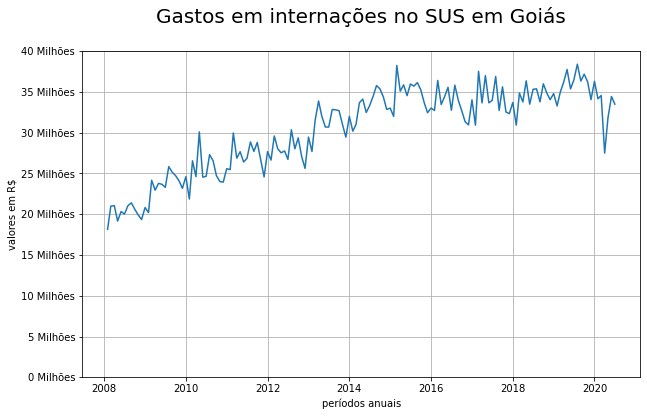

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

plt.figure(figsize=(10,6))

ax = sns.lineplot(data=mensal/1e6, x=mensal.index, y='52 Goiás')

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f} Milhões'))
#plt.xticks(rotation=30)
plt.grid()
plt.ylim(0,40)
plt.ylabel('valores em R$')
plt.xlabel('períodos anuais')
plt.title('Gastos em internações no SUS em Goiás\n', size=20)

plt.show()

O seaborn, por saber que os índices se tratam de variáveis do tipo date, altera automaticamente a tick no eixo x, escolhendo o que é melhor para a visualização.

## Trabalhando com o `melt`

Se quisermos fazer um gráfico com mais de um estado, poderíamos acrescentar mais um plot usando o seaborn. Mas isso não é prático. Imagine por exemplo que você queira plotar 10 estados. Seriam 10 linhas de código só para plotar as linhas.

A função `lineplot` possui uma opção `hue`, que classifica os tipos de dados que estamos plotando. Mas para usar essa e outras funcionalidades do `lineplot`,precisamos modificar nosso dataframe.

No momento, a tabela `mensal` tem essa cara:

In [7]:
mensal.head()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,15 Pará,21 Maranhão,32 Espírito Santo,24 Rio Grande do Norte,25 Paraíba,53 Distrito Federal,50 Mato Grosso do Sul,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
2008-02-01,1.728349e+08,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
2008-03-01,1.704818e+08,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2008-04-01,1.702783e+08,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
2008-05-01,1.724022e+08,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
2008-06-01,1.754166e+08,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


Vamos pensar que queremos uma coluna que informe qual é a Unidade Federativa. As colunas de `mensal` serão absoletas agora. Com duas colunas, uma da Unidade Federativa e outra informando o gasto, podemos passar a mesma informação da tabela acima, com menos colunas, mas com mais linhas.

Uma função que fará essa alteração no dataframe é a `melt`. Ela abre as informações das colunas em novas linhas do dataframe. A [documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) explica com exemplos as opções da função, mas algumas são `id_vars`, `value_vars`, `var_name` e `value_name`.

+ `id_vars` indica quais colunas manter. No caso aqui, queremos manter as datas.
+ `value_vars` indica quais colunas o pandas transformará em linhas. Neste caso, serão todas as colunas dos estados. Por padrão a função pega todas as colunas que não foram colocadas em `id_values`. Por isso, não utilizaremos esta opção.
+ `var_name` será o nome dado à coluna que contém as informações dos **nomes** das colunas transformadas em linhas. No caso aqui são os estados.
+ `value_name` será o nome dado à coluna que contém as informações do **dados** das colunas transformadas em linhas. No caso aqui, são os gastos.

Mas antes de aplicarmos a função, precisamos transformar as datas, que são o índice do dataframe, em uma coluna. Isso pode ser feito facilmente adicionando o comando `reset_index

In [8]:
mensal.reset_index().head()

Unidade da Federação,index,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,15 Pará,21 Maranhão,32 Espírito Santo,24 Rio Grande do Norte,25 Paraíba,53 Distrito Federal,50 Mato Grosso do Sul,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
0,2008-02-01,1.728349e+08,70301089.50,48855046.46,45897704.82,44122593.19,33410124.06,26222079.10,24409572.92,27643304.86,18149374.27,20126081.01,13452263.93,10032886.43,9110108.87,10871589.62,10215956.80,8279288.79,9711680.20,8112220.30,7929894.93,7934652.10,4636850.76,5051932.07,1940792.63,1743978.66,771687.83,1275063.72
1,2008-03-01,1.704818e+08,79119005.51,55611791.07,52928695.92,42892665.52,41301703.40,30716361.81,27483480.50,30085370.22,20992213.03,22149375.82,14750895.33,12262049.08,10126626.54,12348758.14,11627918.26,9793888.78,10428191.09,9210505.56,9416367.68,8641517.13,5017838.07,5200151.87,1955721.68,2057439.02,876091.18,1177745.93
2,2008-04-01,1.702783e+08,79046322.41,56115135.82,51972416.77,45295962.86,42826993.62,30589332.79,27806641.44,31376221.00,21049477.30,23436682.75,15148647.11,12453466.98,10964234.85,12680965.13,11922015.36,8997542.75,10227943.00,10466691.94,9390588.03,8531576.49,5265951.03,5343714.73,2143353.81,2057829.69,896952.53,1396371.51
3,2008-05-01,1.724022e+08,79268070.12,55574831.93,51679350.79,43951349.46,42071294.17,31409553.23,28354279.52,31189904.62,19162546.79,23861080.80,14543679.92,11789786.09,11032871.23,13258411.71,11900817.00,9842108.59,10562148.66,9844096.03,9378197.25,9079902.15,5367094.94,5344487.99,2280382.58,2226577.93,1027288.73,1411520.77
4,2008-06-01,1.754166e+08,79608652.53,56094754.74,53759674.01,44102925.77,39910042.40,28947510.92,28993292.76,29463965.11,20332533.92,23502915.90,14553978.06,11889687.35,10450599.08,12246686.33,11969271.76,10257782.00,10465088.93,10288668.11,9450300.60,8646295.77,4981036.36,5398413.09,2624542.97,2112576.82,938293.54,1420892.01


Note que ao aplicar a função, as datas são colocadas numa coluna chamada "index". Vamos aplicar a função `melt` agora.

In [9]:
mensal.reset_index().melt(id_vars='index', var_name='UF', value_name='gasto')

,index,UF,gasto
0,2008-02-01,35 São Paulo,1.728349e+08
1,2008-03-01,35 São Paulo,1.704818e+08
2,2008-04-01,35 São Paulo,1.702783e+08
3,2008-05-01,35 São Paulo,1.724022e+08
4,2008-06-01,35 São Paulo,1.754166e+08
...,...,...,...
4045,2020-03-01,16 Amapá,2.286241e+06
4046,2020-04-01,16 Amapá,1.774558e+06
4047,2020-05-01,16 Amapá,2.701015e+06
4048,2020-06-01,16 Amapá,2.699492e+06


Deu certo! Para melhorar a tabela, vamos apenas renomear a coluna "index":

In [10]:
mensal_aberto = mensal.reset_index().melt(id_vars='index', var_name='UF', value_name='gasto')
mensal_aberto['data'] = mensal_aberto['index']
mensal_aberto.drop('index', axis=1, inplace=True)
mensal_aberto.head()

,UF,gasto,data
0,35 São Paulo,1.728349e+08,2008-02-01
1,35 São Paulo,1.704818e+08,2008-03-01
2,35 São Paulo,1.702783e+08,2008-04-01
3,35 São Paulo,1.724022e+08,2008-05-01
4,35 São Paulo,1.754166e+08,2008-06-01


Agora sim podemos utilizar melhor a função `lineplot`:

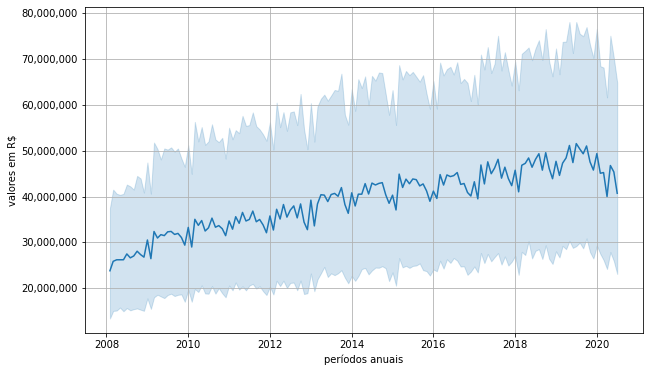

In [11]:
plt.figure(figsize=(10,6))


ax = sns.lineplot(data=mensal_aberto, x='data', y='gasto')

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#plt.xticks(rotation=30)
plt.grid()
plt.ylabel('valores em R$')
plt.xlabel('períodos anuais')

plt.show()

Mas por padrão, quando há mais de um valor em y para cada valor de x, o `lineplot` faz a média desses valores de y. No caso aqui teríamos a média entre os estados. Mas não é isso que queremos. O que queremos é que os valores para cada estado seja uma linha diferente no gráfico. Então utilizamos o parâmetro `hue`.

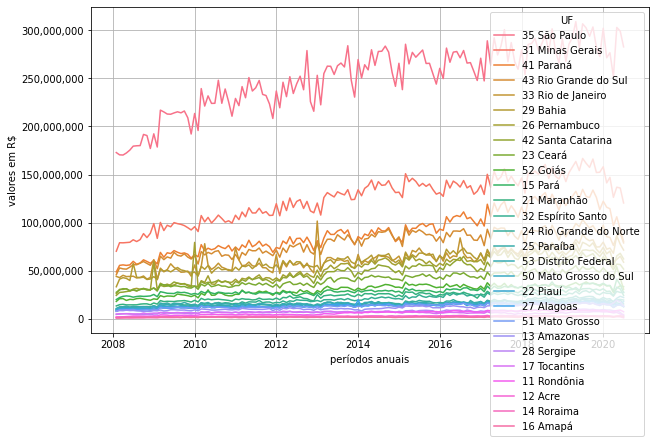

In [12]:
plt.figure(figsize=(10,6))


ax = sns.lineplot(data=mensal_aberto, x='data', y='gasto', hue='UF')

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=12,offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#plt.xticks(rotation=30)
plt.grid()
plt.ylabel('valores em R$')
plt.xlabel('períodos anuais')

plt.show()

## Desafios:

Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.

### Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

[Aqui](https://vaiprogramar.com/como-trabalhar-com-data-hora-python-datetime/) você encontra um resumo de como o python lida com a datação e como é utilizar as bibliotecas `datetime` e `dateutil`. E [aqui](https://docs.python.org/pt-br/3/library/datetime.html) a documentação python de `datetime` em pt.

Essas bibliotecas facilitam a manipulação de datas. Por exemplo, se quisermos saber quantos meses passaram-se de Fevereiro de 2008 a Julho de 2020, podemos usar o método `dateutil.relativedelta()`:

In [13]:
from dateutil.relativedelta import relativedelta

relativedelta(mensal.index[-1], mensal.index[0])

relativedelta(years=+12, months=+5)

In [14]:
# agora, somente em meses:

tempo = relativedelta(mensal.index[-1], mensal.index[0])
tempo.years*12 + tempo.months

149

### Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

Temos o dataframe `mensal_aberto`, queremos transformá-lo de volta em `mensal`. Há um método do pandas que agrupa linhas que se chama `pivot_table`. [Aqui](https://www.vooo.pro/insights/pivot-table-em-pandas-explicado/) você encontra um guia de como usá-lo e [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) a documentação. Vamos dar uma olhada no dataframe `mensal_aberto` para saber o que queremos agrupar.

In [15]:
mensal_aberto.head(2)

,UF,gasto,data
0,35 São Paulo,1.728349e+08,2008-02-01
1,35 São Paulo,1.704818e+08,2008-03-01


Aqui o objetivo é agrupar os gastos por data, mas separando os dados de `mensal_aberto['UF']` em outras colunas. Para isso vamos usar os parâmetros `index`, `columns` e `values` do método. Perceba que a quantidade de informação será a mesma, não precisaremos agrupar valores com médias ou somas.

+ `index` recebe os valores que se tornarão os índices do novo dataframe. Valores repetidos serão agrupados.

+ `columns` recebe os valores que se tornarão as colunas do novo dataframe. Valores repetidos também serão agrupados.

+ `values` recebe os valores que precisam ser agrupados. No caso, se tivessem que ser agrupados, por padrão o método colocaria a média, mas aqui não será necessário.

In [16]:
pd.pivot_table(mensal_aberto, index='data', columns='UF', values='gasto')

UF,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
data,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-02-01,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,27643304.86,9110108.87,10871589.62,26222079.10,8112220.30,4636850.76,33410124.06,7.030109e+07,10032886.43,44122593.19,1.728349e+08,4.885505e+07,24409572.92,45897704.82,8279288.79,7929894.93,18149374.27,10215956.80
2008-03-01,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,30085370.22,10126626.54,12348758.14,30716361.81,9210505.56,5017838.07,41301703.40,7.911901e+07,12262049.08,42892665.52,1.704818e+08,5.561179e+07,27483480.50,52928695.92,9793888.78,9416367.68,20992213.03,11627918.26
2008-04-01,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,31376221.00,10964234.85,12680965.13,30589332.79,10466691.94,5265951.03,42826993.62,7.904632e+07,12453466.98,45295962.86,1.702783e+08,5.611514e+07,27806641.44,51972416.77,8997542.75,9390588.03,21049477.30,11922015.36
2008-05-01,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,31189904.62,11032871.23,13258411.71,31409553.23,9844096.03,5367094.94,42071294.17,7.926807e+07,11789786.09,43951349.46,1.724022e+08,5.557483e+07,28354279.52,51679350.79,9842108.59,9378197.25,19162546.79,11900817.00
2008-06-01,2624542.97,2112576.82,8646295.77,938293.54,23502915.90,1420892.01,5398413.09,14553978.06,10465088.93,29463965.11,10450599.08,12246686.33,28947510.92,10288668.11,4981036.36,39910042.40,7.960865e+07,11889687.35,44102925.77,1.754166e+08,5.609475e+07,28993292.76,53759674.01,10257782.00,9450300.60,20332533.92,11969271.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,7174312.31,2859102.06,14773739.41,2813954.05,34749098.46,2286241.46,7025821.12,28832662.46,15318975.43,46395356.97,20936692.02,17607478.01,59628674.07,15998721.86,9193248.73,70340301.29,1.470786e+08,26555688.68,73594497.93,2.766063e+08,1.144770e+08,56709962.09,84651396.59,17357008.80,14444207.60,34558308.52,19405446.88
2020-04-01,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,17319947.66,15386630.89,53843729.23,14241361.44,8395906.57,59109689.20,1.263306e+08,23735724.64,68160773.35,2.516964e+08,9.672711e+07,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020-05-01,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,19916570.52,18970543.57,65424719.40,15254204.31,8450209.57,61756775.71,1.368673e+08,28614683.75,86281033.16,3.028577e+08,1.061037e+08,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22


Perceba que o resultado é o que queremos. Para se tornar identicamente igual ao dataframe `mensal`, só temos ainda que retirar o nome dos índices, que aqui ficou como `data`, e reodernar as colunas pelos maiores gastos.

In [17]:
mensal_original = pd.pivot_table(mensal_aberto, index='data', columns='UF', values='gasto')
mensal_original.index.name = None



mensal_original.head()

UF,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008-02-01,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,27643304.86,9110108.87,10871589.62,26222079.10,8112220.30,4636850.76,33410124.06,70301089.50,10032886.43,44122593.19,1.728349e+08,48855046.46,24409572.92,45897704.82,8279288.79,7929894.93,18149374.27,10215956.80
2008-03-01,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,30085370.22,10126626.54,12348758.14,30716361.81,9210505.56,5017838.07,41301703.40,79119005.51,12262049.08,42892665.52,1.704818e+08,55611791.07,27483480.50,52928695.92,9793888.78,9416367.68,20992213.03,11627918.26
2008-04-01,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,31376221.00,10964234.85,12680965.13,30589332.79,10466691.94,5265951.03,42826993.62,79046322.41,12453466.98,45295962.86,1.702783e+08,56115135.82,27806641.44,51972416.77,8997542.75,9390588.03,21049477.30,11922015.36
2008-05-01,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,31189904.62,11032871.23,13258411.71,31409553.23,9844096.03,5367094.94,42071294.17,79268070.12,11789786.09,43951349.46,1.724022e+08,55574831.93,28354279.52,51679350.79,9842108.59,9378197.25,19162546.79,11900817.00
2008-06-01,2624542.97,2112576.82,8646295.77,938293.54,23502915.90,1420892.01,5398413.09,14553978.06,10465088.93,29463965.11,10450599.08,12246686.33,28947510.92,10288668.11,4981036.36,39910042.40,79608652.53,11889687.35,44102925.77,1.754166e+08,56094754.74,28993292.76,53759674.01,10257782.00,9450300.60,20332533.92,11969271.76


In [18]:
mensal_original.loc['total'] = mensal_original.sum(axis=0)
mensal_original = mensal_original.sort_values('total', ascending=False, axis=1)

mensal_original.tail()

UF,35 São Paulo,31 Minas Gerais,41 Paraná,43 Rio Grande do Sul,33 Rio de Janeiro,29 Bahia,26 Pernambuco,42 Santa Catarina,23 Ceará,52 Goiás,15 Pará,21 Maranhão,32 Espírito Santo,24 Rio Grande do Norte,25 Paraíba,53 Distrito Federal,50 Mato Grosso do Sul,22 Piauí,27 Alagoas,51 Mato Grosso,13 Amazonas,28 Sergipe,17 Tocantins,11 Rondônia,12 Acre,14 Roraima,16 Amapá
2020-04-01,2.516964e+08,1.263306e+08,9.672711e+07,7.629460e+07,6.816077e+07,5.910969e+07,5.384373e+07,5.117999e+07,4.346882e+07,2.749931e+07,2.871497e+07,2.393816e+07,2.373572e+07,1.731995e+07,1.538663e+07,1.812390e+07,1.565277e+07,1.187859e+07,1.424136e+07,1.194371e+07,1.633091e+07,8.395907e+06,6.204453e+06,7.423679e+06,2.472063e+06,2.304961e+06,1.774558e+06
2020-05-01,3.028577e+08,1.368673e+08,1.061037e+08,8.607611e+07,8.628103e+07,6.175678e+07,6.542472e+07,5.684360e+07,5.420034e+07,3.187011e+07,4.124850e+07,3.297945e+07,2.861468e+07,1.991657e+07,1.897054e+07,2.143743e+07,1.670385e+07,1.417505e+07,1.525420e+07,1.398148e+07,1.944115e+07,8.450210e+06,6.732371e+06,8.581195e+06,2.383895e+06,2.910776e+06,2.701015e+06
2020-06-01,2.990609e+08,1.359776e+08,9.290146e+07,8.901948e+07,7.760493e+07,6.515930e+07,6.814511e+07,5.650375e+07,4.214656e+07,3.443763e+07,3.539603e+07,3.112814e+07,2.745087e+07,2.021996e+07,1.966610e+07,2.347977e+07,1.583866e+07,1.537552e+07,1.427887e+07,1.458501e+07,1.750933e+07,6.705923e+06,5.018138e+06,9.193594e+06,2.199921e+06,3.216467e+06,2.699492e+06
2020-07-01,2.827096e+08,1.204672e+08,8.032085e+07,7.892970e+07,7.154023e+07,5.889810e+07,6.232544e+07,5.176453e+07,3.080922e+07,3.349928e+07,2.761873e+07,2.437421e+07,2.746048e+07,1.959306e+07,1.549147e+07,2.223354e+07,1.250872e+07,1.801921e+07,1.308785e+07,1.308315e+07,1.335851e+07,3.312766e+06,4.489666e+06,7.407388e+06,1.163813e+06,2.739498e+06,2.155083e+06
total,3.762312e+10,1.881718e+10,1.364064e+10,1.181959e+10,9.384110e+09,9.077134e+09,7.933835e+09,7.226235e+09,6.131617e+09,4.549173e+09,4.382999e+09,3.583485e+09,3.102627e+09,2.449954e+09,2.436277e+09,2.393150e+09,2.151671e+09,2.102313e+09,2.076835e+09,2.014168e+09,1.747039e+09,1.119375e+09,9.878554e+08,9.225302e+08,4.177534e+08,3.017770e+08,2.881243e+08


Para entender melhor como o método `pivot_table` agrupa os dados, vamos retirar o parâmetro `columns`. Ou seja, estamos agrupando todas as Unidades Federativas. Por padrão, o método retornará a **média** dos gastos para cada data. Outras opções de agregação dos valores, como soma, mínimo, máximo ou outras funções numpy, utiliza-se o parâmetro `aggfunc`.

In [19]:
pd.pivot_table(mensal_aberto, index='data', values='gasto')

,gasto
data,
2008-02-01,2.381640e+07
2008-03-01,2.587608e+07
2008-04-01,2.621042e+07
2008-05-01,2.621533e+07
2008-06-01,2.621581e+07
...,...
2020-03-01,4.523603e+07
2020-04-01,4.000568e+07
2020-05-01,4.676903e+07


### Desafio 03: Melhorar o gráfico da distribuição do gráfico:

+ Escolha apenas alguns estados.
+ Mude a palete de cores.
+ Posicione a legenda de forma mais adequada.
+ Adicione título principal e nos eixos x e y.



Vamos criar novamente a coluna "Região", para facilitar as querys.

In [20]:
codigo_regiao = {1:'Norte', 2:'Nordeste', 3:'Sudeste', 4:'Sul', 5:'Centro-Oeste'}
regioes = []
for estado in mensal_aberto['UF']:
  regioes.append(codigo_regiao[int(estado[0])])

mensal_aberto['Região'] = regioes
mensal_aberto['Região']

0       Sudeste
1       Sudeste
2       Sudeste
3       Sudeste
4       Sudeste
         ...   
4045      Norte
4046      Norte
4047      Norte
4048      Norte
4049      Norte
Name: Região, Length: 4050, dtype: object

#### Gráfico da Região Centro-Oeste:

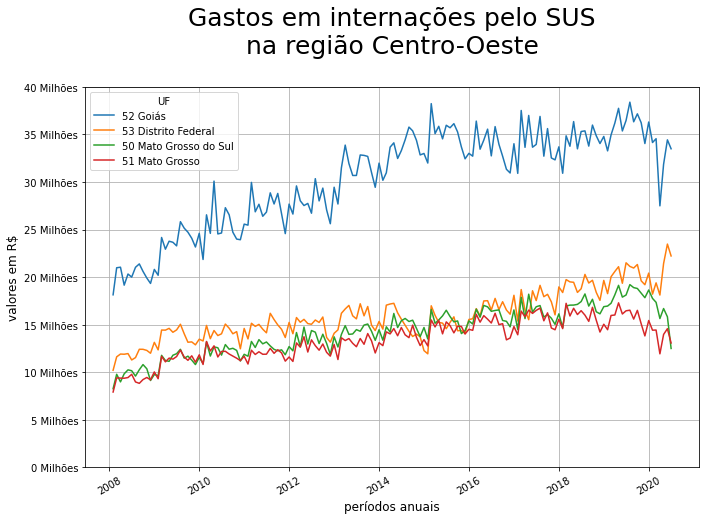

In [40]:
plt.figure(figsize=(11,7))

mensal_aberto['gasto em milhões'] = mensal_aberto['gasto']/1e6
ax = sns.lineplot(data=mensal_aberto.query('Região == "Centro-Oeste"'), x='data', y='gasto em milhões', hue='UF')

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=365,offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f} Milhões'))
plt.xticks(rotation=30)
plt.grid()
plt.ylabel('valores em R$', size=12)
plt.xlabel('períodos anuais', size=12)
plt.title('Gastos em internações pelo SUS\nna região Centro-Oeste\n', size=25)
plt.ylim(0,40)

plt.show()

#### Gráfico dos 5 estados com maiores gastos

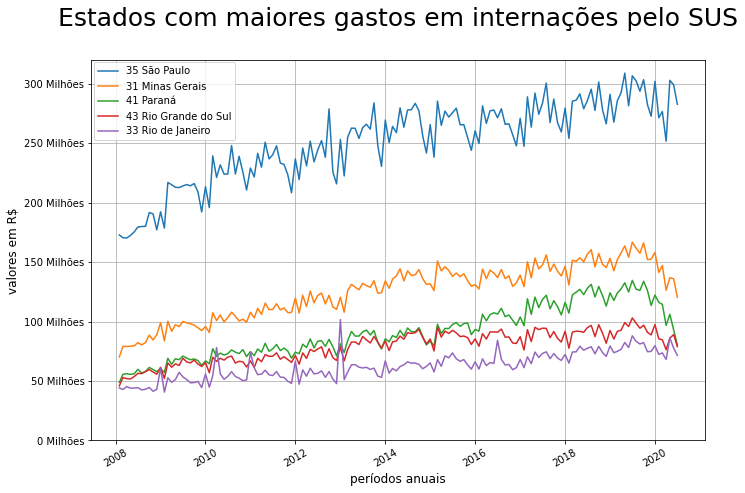

In [57]:
plt.figure(figsize=(11,7))

mensal_aberto['gasto em milhões'] = mensal_aberto['gasto']/1e6
ax = sns.lineplot(data=mensal_aberto.loc[mensal_aberto.index[0:750]], x='data', y='gasto em milhões', hue='UF')

#ax.xaxis.set_major_locator(ticker.IndexLocator(base=365,offset=0))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f} Milhões'))
plt.xticks(rotation=30)
plt.grid()
plt.ylabel('valores em R$', size=12)
plt.xlabel('períodos anuais', size=12)
plt.title('Estados com maiores gastos em internações pelo SUS\n', size=25)
plt.legend(bbox_to_anchor=(0,1), loc=2, borderaxespad=0.25)
plt.ylim(0,320)

plt.show()

# Salvando o dataframe `mensal_aberto` para arquivar no github

In [59]:
mensal_aberto.head()

,UF,gasto,data,Região,gasto em milhões
0,35 São Paulo,1.728349e+08,2008-02-01,Sudeste,172.834915
1,35 São Paulo,1.704818e+08,2008-03-01,Sudeste,170.481850
2,35 São Paulo,1.702783e+08,2008-04-01,Sudeste,170.278286
3,35 São Paulo,1.724022e+08,2008-05-01,Sudeste,172.402181
4,35 São Paulo,1.754166e+08,2008-06-01,Sudeste,175.416596


In [60]:
mensal_aberto.to_csv('out_mensal_aberto.csv')